## Installing Packages

In [ ]:
# #install python 3.9 on google colab for Federated
# !sudo apt-get update -y
# !sudo apt-get install python3.9

# #change alternatives
# !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
# !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 2

# #check python version
# !python --version

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://ppa.launchpad.net

In [ ]:
# # Installing pip
# !sudo apt-get install python3-pip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  python-pip-whl python3-asn1crypto python3-cffi-backend python3-crypto
  python3-cryptography python3-idna python3-keyring python3-keyrings.alt
  python3-pkg-resources python3-secretstorage python3-setuptools python3-six
  python3-wheel python3-xdg
Suggested packages:
  python-crypto-doc python-cryptography-doc python3-cryptography-vectors
  gnome-keyring libkf5wallet-bin gir1.2-gnomekeyring-1.0
  python-secretstorage-doc python-setuptools-doc
The following NEW packages will be installed:
  python-pip-whl python3-asn1crypto python3-cffi-backend python3-crypto
  python3-cryptography python3-idna python3-keyring python3-keyrings.alt
  python3-pip python3-pkg-resources python3-secretstorage python3-setup

In [ ]:
# !sudo apt-get install python3.9-distutils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  python3.9-lib2to3
The following NEW packages will be installed:
  python3.9-distutils python3.9-lib2to3
0 upgraded, 2 newly installed, 0 to remove and 7 not upgraded.
Need to get 315 kB of archives.
After this operation, 1,234 kB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd64 python3.9-lib2to3 all 3.9.15-1+bionic1 [125 kB]
Get:2 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd64 python3.9-distutils all 3.9.15-1+bionic1 [190 kB]
Fetched 315 kB in 1s (343 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/De

In [ ]:
# !python3 -m pip install --user --upgrade pip

    100% |████████████████████████████████| 2.1MB 576kB/s 


## Import Necessary Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Dropout, Input
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm 
import os
import re

## Load data
This dataset consist of 188 image and their corresponding sketches. As these images aren't enough for training our autoencoder model, I have augmented them using open cv library. After Augmentation I have got around 1500 images, these 1500 images also might not be enough but let's give a try. These images are converted into array and are stored in the list.

In [ ]:
# Loading data present in Google Drive - Authorization step
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials # Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/PhotoToSketch')

Mounted at /content/PhotoToSketch


In [ ]:
# to get the files in proper order
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)


# defining the size of image 
SIZE = 256

image_path = 'PhotoToSketch/MyDrive/PhotoToSketch/photos'
img_array = []

sketch_path = 'PhotoToSketch/MyDrive/PhotoToSketch/sketches'
sketch_array = []

image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))

# Pre-processing for photos
for i in tqdm(image_file):
    image = cv2.imread(image_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    image = cv2.resize(image, (128,128))
    
    #appending normal normal image    
    img_array.append(img_to_array(image))
    
    # Image Augmentation
    
    # horizontal flip 
    img1 = cv2.flip(image,1)
    img_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    img_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    img_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    img_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    img_array.append(img_to_array(img7))
  

# Pre-processing for sketches   
for i in tqdm(sketch_file):
    image = cv2.imread(sketch_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    image = cv2.resize(image, (128,128))
    # appending normal sketch image
    sketch_array.append(img_to_array(image))
    
    #Image Augmentation
    # horizontal flip 
    img1 = cv2.flip(image,1)
    sketch_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    sketch_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    sketch_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    sketch_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    sketch_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    sketch_array.append(img_to_array(img7))    

100%|██████████| 188/188 [00:31<00:00,  6.05it/s]


In [ ]:
print("Total number of sketch images:",len(sketch_array))
print("Total number of images:",len(img_array))

Total number of sketch images: 1504
Total number of images: 1504


# Visualizing images
Here i have plotted all augmented images and its augmented sketches

In [ ]:
# defining function to plot image and sketch pair
def plot_images(image, sketches):
    plt.style.use('dark_background')
    plt.figure(figsize=(7,7))
    plt.subplot(1,2,1)
    plt.title('Image', color = '#aa42f5', fontsize = 24, fontweight="bold")
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.title('Sketches ', color = '#f542dd', fontsize = 24, fontweight="bold")
    plt.imshow(sketches)
   
    plt.show()

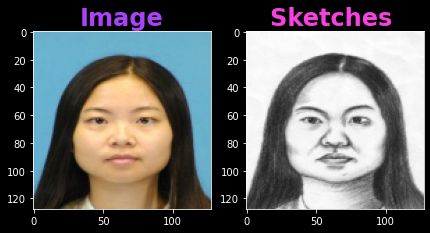

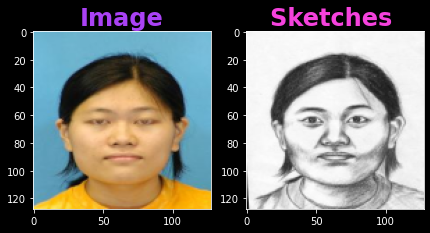

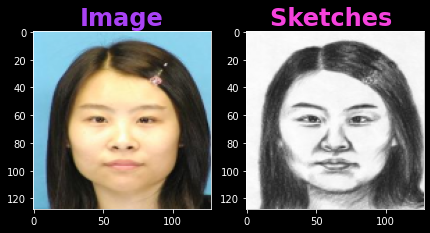

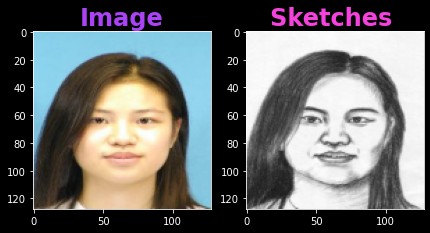

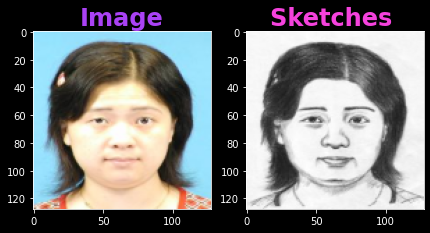

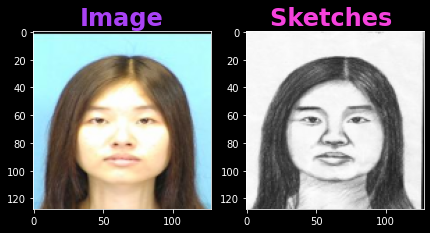

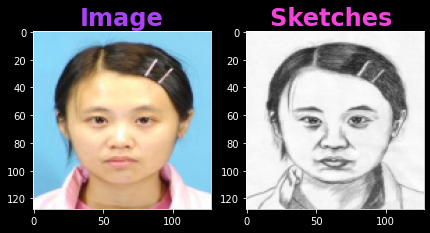

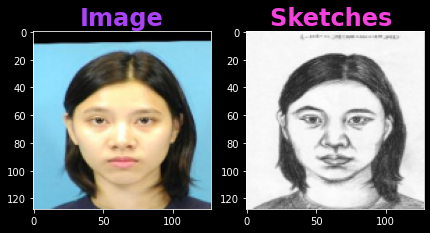

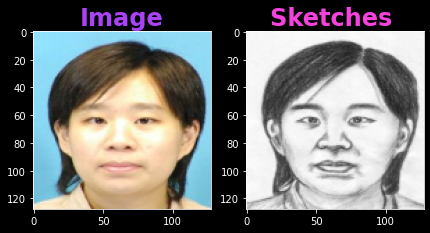

In [ ]:
ls = [i for i in range(0,65,8)]
for i in ls:
    plot_images(img_array[i],sketch_array[i])

In [ ]:
img_array[0]

array([[[0.39607844, 0.6862745 , 0.7921569 ],
        [0.39607844, 0.6862745 , 0.7921569 ],
        [0.4       , 0.6901961 , 0.79607844],
        ...,
        [0.41568628, 0.6784314 , 0.78039217],
        [0.41568628, 0.6784314 , 0.78039217],
        [0.41568628, 0.6784314 , 0.78039217]],

       [[0.39607844, 0.6862745 , 0.7921569 ],
        [0.39607844, 0.6862745 , 0.7921569 ],
        [0.4       , 0.6901961 , 0.79607844],
        ...,
        [0.41764706, 0.68039215, 0.7823529 ],
        [0.41764706, 0.68039215, 0.7823529 ],
        [0.41764706, 0.68039215, 0.7823529 ]],

       [[0.39607844, 0.6862745 , 0.7921569 ],
        [0.39607844, 0.6862745 , 0.7921569 ],
        [0.4       , 0.6901961 , 0.79607844],
        ...,
        [0.42156863, 0.6843138 , 0.78627455],
        [0.42156863, 0.6843138 , 0.78627455],
        [0.42156863, 0.6843138 , 0.78627455]],

       ...,

       [[0.10980393, 0.10588236, 0.09019608],
        [0.10490196, 0.10098039, 0.08529412],
        [0.11568628, 0

In [ ]:
print(img_array[0].shape)

(128, 128, 3)


##Creating Dataframe

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame()

In [ ]:
df['Img_Array'] = img_array
df['Sketch_Array'] = sketch_array

In [ ]:
df.head()

,Img_Array,Sketch_Array
0,"[[[0.39607844, 0.6862745, 0.7921569], [0.39607...","[[[0.9647059, 0.9647059, 0.9647059], [0.964705..."
1,"[[[0.41568628, 0.6784314, 0.78039217], [0.4156...","[[[0.9666667, 0.9666667, 0.9666667], [0.967647..."
2,"[[[0.327451, 0.22156863, 0.10882354], [0.32745...","[[[0.4401961, 0.4401961, 0.4401961], [0.422549..."
3,"[[[0.13333334, 0.13333334, 0.101960786], [0.11...","[[[0.20784314, 0.20784314, 0.20784314], [0.202..."
4,"[[[0.13333334, 0.13333334, 0.101960786], [0.08...","[[[0.20784314, 0.20784314, 0.20784314], [0.224..."


##Creating Federated Data

In [ ]:
# Import and Install necessary libraries for federated learning

!pip install --quiet --upgrade tensorflow-federated --use-deprecated=legacy-resolver
!pip install --quiet --upgrade nest-asyncio --use-deprecated=legacy-resolver

import nest_asyncio
nest_asyncio.apply()

     |████████████████████████████████| 885 kB 12.9 MB/s 
     |████████████████████████████████| 60 kB 6.8 MB/s 
     |████████████████████████████████| 71.2 MB 73 kB/s 
     |████████████████████████████████| 301 kB 7.6 MB/s 
     |████████████████████████████████| 1.1 MB 37.7 MB/s 
     |████████████████████████████████| 511.8 MB 28 kB/s 
     |████████████████████████████████| 78 kB 8.0 MB/s 
     |████████████████████████████████| 4.4 MB 56.3 MB/s 
     |████████████████████████████████| 89 kB 10.3 MB/s 
     |████████████████████████████████| 5.7 MB 35.3 MB/s 
     |████████████████████████████████| 11.2 MB 60.3 MB/s 
ERROR: Could not find a version that satisfies the requirement pandas~=1.4 (from tensorflow-privacy~=0.8.1->tensorflow-federated) (from versions: 0.1, 0.2, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.8.0, 0.8.1, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16

In [ ]:
# Adding a column for Client IDs in the dataset: We take 7 clients and assign them randomly to each row for further processing in federated learning
df['Client_ID'] = np.random.randint(1, 7, df.shape[0])
df.head(10)

,Img_Array,Sketch_Array,Client_ID
0,"[[[0.39607844, 0.6862745, 0.7921569], [0.39607...","[[[0.9647059, 0.9647059, 0.9647059], [0.964705...",1
1,"[[[0.41568628, 0.6784314, 0.78039217], [0.4156...","[[[0.9666667, 0.9666667, 0.9666667], [0.967647...",4
2,"[[[0.327451, 0.22156863, 0.10882354], [0.32745...","[[[0.4401961, 0.4401961, 0.4401961], [0.422549...",6
3,"[[[0.13333334, 0.13333334, 0.101960786], [0.11...","[[[0.20784314, 0.20784314, 0.20784314], [0.202...",4
4,"[[[0.13333334, 0.13333334, 0.101960786], [0.08...","[[[0.20784314, 0.20784314, 0.20784314], [0.224...",5
5,"[[[0.39607844, 0.6862745, 0.7921569], [0.39607...","[[[0.9647059, 0.9647059, 0.9647059], [0.964705...",6
6,"[[[0.41568628, 0.6784314, 0.78039217], [0.4176...","[[[0.9666667, 0.9666667, 0.9666667], [0.967647...",5
7,"[[[0.327451, 0.22156863, 0.10882354], [0.32254...","[[[0.4401961, 0.4401961, 0.4401961], [0.399019...",5
8,"[[[0.41568628, 0.7058824, 0.8117647], [0.41568...","[[[0.95882356, 0.95882356, 0.95882356], [0.956...",2
9,"[[[0.44509804, 0.7352941, 0.8411765], [0.45098...","[[[0.9647059, 0.9647059, 0.9647059], [0.954901...",5


In [ ]:
df['Client_ID'].value_counts()

1    280
4    259
2    252
5    245
3    243
6    225
Name: Client_ID, dtype: int64

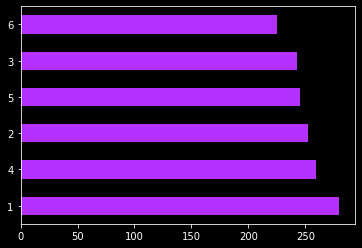

In [ ]:
# Plot the number of clients for each client ID: Here we can see that the distribution is Non-IID type
plt.style.use('dark_background')
df['Client_ID'].value_counts().plot(kind = 'barh', color = '#b430fc')

In [ ]:
# split client ids into train and test clients
train_client_ids = [1,2,3,4]
test_client_ids = [5,6]

In [ ]:
# To convert data into tf.data.Dataset type

import tensorflow as tf
import tensorflow_federated as tff

def create_tf_dataset_for_client_fn(client_id):
  # a function which takes a client_id and returns a
  # tf.data.Dataset for that client
  client_data = df[df['Client_ID'] == client_id]
  # Converts primitive datatypes like list or dictionaries to tensorflow datatype
  dataset = tf.data.Dataset.from_tensor_slices(client_data.to_dict('list'))
  return dataset

ImportError: ignored

In [ ]:
# Creating a test and train data from our original Client Datatset

train_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
        client_ids=train_client_ids,
        serializable_dataset_fn=create_tf_dataset_for_client_fn
    )

test_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
        client_ids=test_client_ids,
        serializable_dataset_fn=create_tf_dataset_for_client_fn
    )

In [ ]:
# Here, we are creating a dataset 1 each client
# Then we traverse through the client dataset using 'iter'
# 'next' means whether the current element has a next element. If true, print the current element
# element = 1 number image

example_dataset = train_data.create_tf_dataset_for_client(
        train_data.client_ids[0]
    )
print("Type of example dataset: ", type(example_dataset))
print("\nLength of example dataset: ",len(example_dataset))

example_element = next(iter(example_dataset))

print("\nSketch pixel shape: ", example_element['Sketch_Array'].numpy().shape)

print("\nImage pixel shape: ", example_element['Img_Array'].numpy().shape)

##Exploring Heterogeniety in Federated Data

In [ ]:
## Example movie posters for one client
figure = plt.figure(figsize=(20, 10))
j = 0

for example in example_dataset.take(20):
  plt.subplot(4, 5, j+1)
  plt.imshow(example['Img_Array'].numpy())
  plt.axis('off')
  j += 1

##Preprocessing Input Data

In [ ]:
import collections

NUM_EPOCHS = 5
BATCH_SIZE = 16
SHUFFLE_BUFFER = 750
PREFETCH_BUFFER = 2

def preprocess(dataset):

  def batch_format_fn(element):
    """Flatten a batch `pixels` and return the features as an `OrderedDict`."""
    return collections.OrderedDict(
        x=tf.reshape(element['Img_Array'], [-1,128,128,3]),
        y=tf.reshape(element['Sketch_Array'], [-1,128,128,3]))

  return dataset.repeat(NUM_EPOCHS).shuffle(SHUFFLE_BUFFER, seed=1).batch(
      BATCH_SIZE).map(batch_format_fn).prefetch(PREFETCH_BUFFER)


In [ ]:
# Checking if the above works

preprocessed_example_dataset = preprocess(example_dataset)

sample_batch = tf.nest.map_structure(lambda x: x.numpy(),
                                     next(iter(preprocessed_example_dataset)))

In [ ]:
preprocessed_example_dataset.element_spec

In [ ]:
# Since 5 batches
sample_batch['x'].shape

In [ ]:
sample_batch['y'].shape

##Making Federated Data

In [ ]:
def make_federated_data(client_data, client_ids):
  return [
      preprocess(client_data.create_tf_dataset_for_client(x))
      for x in client_ids
  ]

In [ ]:
# Helper function to get random set of clients for each round

from random import randint 

def get_new_federated_data(client_data, NUM_CLIENTS):

    def get_clients_set(client_data):
        sample_clients = []
        for i in range(NUM_CLIENTS):
            idx = randint(0, len(client_data.client_ids)-1)
            while(client_data.client_ids[idx] in sample_clients):
                idx = randint(0, len(client_data.client_ids)-1)
            sample_clients.append(client_data.client_ids[idx])

        print('Picked random clients: ', sample_clients)
        return sample_clients
    
    sample_clients = get_clients_set(client_data)
    return make_federated_data(client_data, sample_clients)

In [ ]:
get_new_federated_data(train_data, 3)

## Downsample layer for encoder

In [ ]:
def downsample(filters, size, apply_batch_normalization = True):
    downsample = tf.keras.models.Sequential()
    downsample.add(keras.layers.Conv2D(filters = filters, kernel_size = size, strides = 2, use_bias = False, kernel_initializer = 'he_normal'))
    if apply_batch_normalization:
        downsample.add(keras.layers.BatchNormalization())
    downsample.add(tf.keras.layers.Activation('tanh'))
    return downsample

## Upsample Layer for decoder


In [ ]:
def upsample(filters, size, apply_dropout = False):
    upsample = tf.keras.models.Sequential()
    upsample.add(keras.layers.Conv2DTranspose(filters = filters, kernel_size = size, strides = 2, use_bias = False, kernel_initializer = 'he_normal'))
    if apply_dropout:
        upsample.add(tf.keras.layers.Dropout(0.3))
    upsample.add(tf.keras.layers.Activation('tanh')) 
    return upsample

# Deep CNN Model 
Here i have use sequence of downsample layer for encoder and upsample layer for decoder

In [ ]:
def make_model():
    
    encoder_input = keras.Input(shape = (128, 128, 3))
    # Output of the previous layer is added using (x)
    x = downsample(16, 4, False)(encoder_input)
    x = downsample(32,4)(x)
    x = downsample(64,4,False)(x)
    x = downsample(128,4)(x)
   
    encoder_output = downsample(256,4)(x)
    
    # same input as the encoder_output
    decoder_input = upsample(256,4,True)(encoder_output)
    x = upsample(128,4,False)(decoder_input)
    x = upsample(64,4,True)(x)
    x = upsample(32,4)(x)
    x = upsample(16,4)(x)

    x = tf.keras.layers.Conv2DTranspose(8,(2,2),strides = (1,1), padding = 'valid')(x)
    decoder_output = tf.keras.layers.Conv2DTranspose(3,(2,2),strides = (1,1), padding = 'valid')(x)
    
  
    return tf.keras.Model(encoder_input, decoder_output)


In [ ]:
# to get summary of model
model = make_model()
model.summary()

In [ ]:
# ## Model
# Here I have defined two blocks of networks. Encoder network takes 256 by 256 image and downsample it to 16 by 16 latent vector
# by passing our image via series of Convolution and Maxpooling layer. This downsampled 16 by 16 latent vector is upsampled by passing 
# through series of Convolution and UpSampling layer. The final decoder output is same as our encoder input. This upsamples output of decoder
# is compared with our sketches and reconstruction loss is calculated. This loss is minimized by updating weight and bias of network through
# backpropagation.
# encoder_input = keras.Input(shape=(SIZE,SIZE, 3), name="img")
# x = Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', padding = 'same')(encoder_input)
# x = MaxPool2D(pool_size = (2,2))(x)

# x = Conv2D(filters = 32,kernel_size = (3,3),strides = (2,2), activation = 'relu', padding = 'valid')(x)
# x = Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), activation = 'relu', padding = 'same')(x)
# x = MaxPool2D(pool_size = (2,2))(x)

# x = Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
# x = Conv2D(filters = 256 , kernel_size = (3,3), activation = 'relu', padding = 'same')(x) 
# encoder_output = Conv2D(filters = 512 , kernel_size = (3,3), activation = 'relu', padding = 'same')(x) 
# encoder = tf.keras.Model(encoder_input, encoder_output)

# decoder_input = Conv2D(filters = 512 ,kernel_size = (3,3), activation = 'relu', padding = 'same')(encoder_output)
# x = UpSampling2D(size = (2,2))(decoder_input)
# x = Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
# x = Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
# x = UpSampling2D(size = (2,2) )(x)

# x = Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
# x = UpSampling2D(size = (2,2) )(x)
# x = Conv2D(filters = 32 , kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
# x = UpSampling2D(size = (2,2) )(x)
 
# x = Conv2D(filters = 16  , kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
# decoder_output = Conv2D(filters = 3, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)

# # final model
# model = keras.Model(encoder_input, decoder_output)
# model.summary()

### Compiling and Fitting our model
Here i have used Adam optimizer for client and SGD for server (with a learning rate of 0.1) and mean_squared_error as loss and have trained model for 30 epochs

In [ ]:
# To use keras model in TFF, it needs to be wrapped in tff.learning.Model
# model_fn just took an a keras model layer architecture and attached a loss function and metrics for evaluation to it. 

def model_fn():
  keras_model = make_model()
  return tff.learning.from_keras_model(
      keras_model,
      input_spec=preprocessed_example_dataset.element_spec,
      loss=tf.keras.losses.MeanSquaredError(),
  )

In [ ]:
# We can let TFF construct a Federated Averaging algorithm (for client server comm) by invoking the helper function tff.learning.build_federated_averaging_process
# Need both client and Server optimizer
# Stick to SGD or Adam and smaller learning rates

iterative_process = tff.learning.build_federated_averaging_process(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0))

In [ ]:
import os
import shutil
from datetime import datetime

logdir = "./tmp/logs/scalars/training/" + datetime.now().strftime("%Y%m%d-%H%M%S")

# Creates a summary file writer for the given log directory.
# writes summary of federated computations in a file for visualization
summary_writer = tf.summary.create_file_writer(logdir)
state = iterative_process.initialize()

In [ ]:
# For Testing
evaluation = tff.learning.build_federated_evaluation(model_fn)

In [ ]:
# Training the model: Learning

NUM_ROUNDS = 15

with summary_writer.as_default():
  for round_num in range(1, NUM_ROUNDS):
    
    state, metrics = iterative_process.next(state, get_new_federated_data(train_data, 3))
    print('round {:2d}, Training Loss={}'.format(round_num, metrics['train']['loss']))
    for name, value in metrics['train'].items():
      tf.summary.scalar(name, value, step=round_num)

    test_loss = evaluation(state.model, get_new_federated_data(test_data, 2))['eval']['loss']
    print("Testing Loss: ", test_loss)

    tf.summary.scalar('test_loss', test_loss, step = round_num)

    print()



In [ ]:
# Training the model: Learning

NUM_ROUNDS = 15

with summary_writer.as_default():
  for round_num in range(15, 15+NUM_ROUNDS):
    
    state, metrics = iterative_process.next(state, get_new_federated_data(train_data, 3))
    print('round {:2d}, Training Loss={}'.format(round_num, metrics['train']['loss']))
    for name, value in metrics['train'].items():
      tf.summary.scalar(name, value, step=round_num)

    test_loss = evaluation(state.model, get_new_federated_data(test_data, 2))['eval']['loss']
    print("Testing Loss: ", test_loss)

    tf.summary.scalar('test_loss', test_loss, step = round_num)

    print()

##Evaluation

In [ ]:
# The model made by server is sent to the client, where the client uses this model on its federated data and gets accuracy and loss individually
# The metrics of each client are averaged and we get the final accuracy and loss metric for training

train_metrics = evaluation(state.model, get_new_federated_data(train_data, 4))

In [ ]:
federated_test_data = get_new_federated_data(test_data, 2)

print(len(federated_test_data), federated_test_data[0])

In [ ]:
test_metrics = evaluation(state.model, federated_test_data)

## Plotting our predicted sketch along with real sketch

In [ ]:
type(federated_test_data[0])

In [ ]:
example_element = next(iter(federated_test_data[0]))
example_element['x']

In [ ]:
model_for_inference = model_fn()
state.model.assign_weights_to(model_for_inference)

In [ ]:
predictions = model_for_inference.predict_on_batch(example_element['x'])

In [ ]:
plt.imshow(predictions[0])

In [ ]:
def show_images(real,predicted):
    plt.style.use('dark_background')
    plt.figure(figsize = (12,12))
    plt.subplot(1,2,1)
    plt.title("Image",fontsize = 15, color = '#aa42f5', fontweight = 'bold')
    plt.imshow(real[0])
    plt.subplot(1,2,2)
    plt.title("Predicted",fontsize = 15, color = '#f542dd', fontweight = 'bold')
    plt.imshow(predicted[0])

In [ ]:
show_images(example_element['x'], predictions)

## Metrics Graph using Tensorboard

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir {logdir} --port=0